In [209]:
import pandas as pd
from pandas import merge

import numpy as np
from numpy import arange

from plotly.offline import init_notebook_mode, iplot, plot, download_plotlyjs
init_notebook_mode(connected=True)
from plotly.tools import FigureFactory as FF
import plotly.plotly as py
import plotly.figure_factory as ff

import scipy
import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram, linkage

import sklearn
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression


from matplotlib import pyplot as plt
from matplotlib import rc
%matplotlib inline

import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import seaborn as sns
sns.set(color_codes=True)

from plotly import __version__
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot, download_plotlyjs
init_notebook_mode(connected=True)

from sklearn.externals.six import StringIO  
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
import graphviz as gv

pd.options.display.max_columns = 50




In [210]:
cf = pd.read_csv('Country_facts.csv')
cf.head()

,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,UEFA_Rank,Attendance,Home_Away_Contrast
0,Nigeria,SUB-SAHARAN AFRICA,131859731,923768,142.7,0.09,0.26,98.80,900.0,68.0,9.3,31.29,2.96,65.75,1.5,40.43,16.94,0.269,0.487,0.244,62,NaN,NaN,0.836696
1,Guatemala,LATIN AMER. & CARIB,12293545,108890,112.9,0.37,-1.67,35.93,4100.0,70.6,92.1,12.54,5.03,82.43,2.0,29.88,5.20,0.227,0.188,0.585,95,NaN,NaN,0.641629
2,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,52.0,11.32,7.23,81.45,2.0,20.34,6.25,0.134,0.458,0.408,178,NaN,9368.0,0.586193
3,Ghana,SUB-SAHARAN AFRICA,22409572,239460,93.6,0.23,-0.64,51.43,2200.0,74.8,14.4,16.26,9.67,74.07,2.0,30.52,9.72,0.366,0.246,0.387,41,NaN,NaN,0.558027
4,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,62.9,10.83,0.83,88.34,1.0,26.36,7.84,0.342,0.229,0.430,74,NaN,6911.0,0.486008


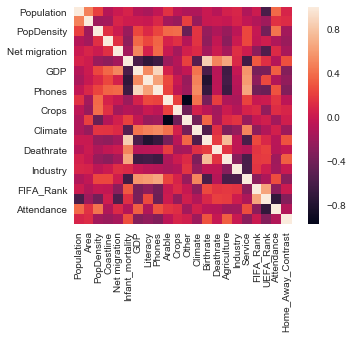

In [211]:

cdemog = cf[['Region', 'Population', 'Area', 'PopDensity', 'Coastline',
       'Net migration', 'Infant_mortality', 'GDP', 'Literacy', 'Phones',
       'Arable', 'Crops', 'Other', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service', 'FIFA_Rank', 'UEFA_Rank',
       'Attendance', 'Home_Away_Contrast']] #Subsetting the data
cor = cdemog.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map


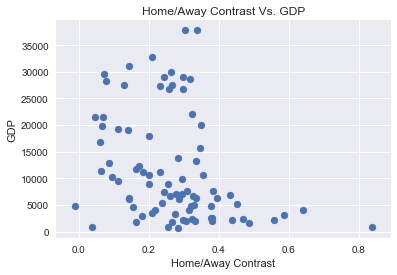

In [212]:
x = cf.Home_Away_Contrast
y = cf.GDP
plt.title("Home/Away Contrast Vs. GDP")
plt.ylabel("GDP")
plt.xlabel("Home/Away Contrast")
plt.scatter(x, y)


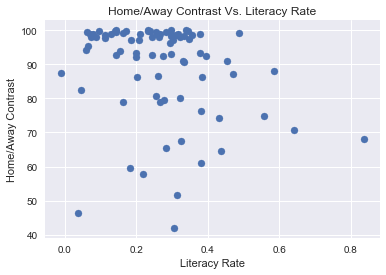

In [213]:
x = cf.Home_Away_Contrast
y = cf.Literacy
plt.title("Home/Away Contrast Vs. Literacy Rate")
plt.xlabel("Literacy Rate")
plt.ylabel("Home/Away Contrast")
plt.axis("normal")
plt.scatter(x, y)

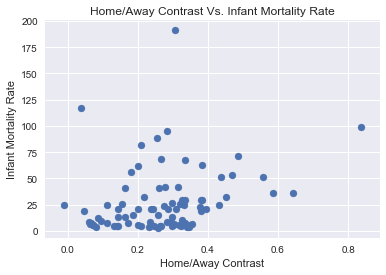

In [214]:
x = cf.Home_Away_Contrast
y = cf.Infant_mortality
plt.title("Home/Away Contrast Vs. Infant Mortality Rate")
plt.ylabel("Infant Mortality Rate")
plt.xlabel("Home/Away Contrast")
plt.scatter(x, y)

In [215]:
census = pd.read_csv("ACS_16_5YR_S1903.csv", encoding="latin-1", skiprows=1)
census.head()

,Id,Id2,Geography,Total; Estimate; Households,Total; Margin of Error; Households,Median income (dollars); Estimate; Households,Median income (dollars); Margin of Error; Households,Total; Estimate; Households - One race-- - Some other race,Total; Margin of Error; Households - One race-- - Some other race,Median income (dollars); Estimate; Households - One race-- - Some other race,Median income (dollars); Margin of Error; Households - One race-- - Some other race,Total; Estimate; FAMILIES - Families,Total; Margin of Error; FAMILIES - Families,Median income (dollars); Estimate; FAMILIES - Families,Median income (dollars); Margin of Error; FAMILIES - Families,Total; Estimate; FAMILIES - Families - With own children of householder under 18 years,Total; Margin of Error; FAMILIES - Families - With own children of householder under 18 years,Median income (dollars); Estimate; FAMILIES - Families - With own children of householder under 18 years,Median income (dollars); Margin of Error; FAMILIES - Families - With own children of householder under 18 years,Total; Estimate; FAMILIES - Families - With no own children of householder under 18 years,Total; Margin of Error; FAMILIES - Families - With no own children of householder under 18 years,Median income (dollars); Estimate; FAMILIES - Families - With no own children of householder under 18 years,Median income (dollars); Margin of Error; FAMILIES - Families - With no own children of householder under 18 years,Total; Estimate; FAMILIES - Families - Married-couple families,Total; Margin of Error; FAMILIES - Families - Married-couple families,...,Median income (dollars); Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households,Total; Estimate; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder,Total; Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder,Median income (dollars); Estimate; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder,Median income (dollars); Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder,Total; Estimate; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder - Living alone,Total; Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder - Living alone,Median income (dollars); Estimate; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder - Living alone,Median income (dollars); Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder - Living alone,Total; Estimate; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder - Not living alone,Total; Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder - Not living alone,Median income (dollars); Estimate; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder - Not living alone,Median income (dollars); Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households - Female householder - Not living alone,Total; Estimate; NONFAMILY HOUSEHOLDS - Nonfamily households - Male householder,Total; Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households - Male householder,Median income (dollars); Estimate; NONFAMILY HOUSEHOLDS - Nonfamily households - Male householder,Median income (dollars); Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households - Male householder,Total; Estimate; NONFAMILY HOUSEHOLDS - Nonfamily households - Male householder - Living alone,Total; Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households - Male householder - Living alone,Median income (dollars); Estimate; NONFAMILY HOUSEHOLDS - Nonfamily households - Male householder - Living alone,Median income (dollars); Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households - Male householder - Living alone,Total; Estimate; NONFAMILY HOUSEHOLDS - Nonfamily households - Male householder - Not living alone,Total; Margin of Error; NONFAMILY HOUSEHOLDS - Nonfamily households - Male householder - Not living alone,Median income (dollars); Estim

In [216]:
nba = pd.read_csv('NBA.csv', encoding="latin-1", sep=",")
nba.head()

,Year,Team,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT
0,1968,Atlanta Hawks,48,34,28,12,18,21,0.700000,0.461538,0.585366
1,1969,Atlanta Hawks,48,34,25,13,18,16,0.657895,0.529412,0.585366
2,1970,Atlanta Hawks,36,46,21,20,14,26,0.512195,0.350000,0.439024
3,1971,Atlanta Hawks,36,46,22,19,13,26,0.536585,0.333333,0.439024
4,1972,Atlanta Hawks,46,36,28,13,17,23,0.682927,0.425000,0.560976


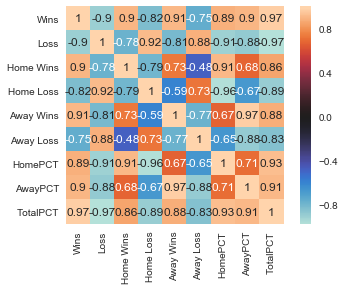

In [217]:
nbacor = nba[['Wins', 'Loss', 'Home Wins', 'Home Loss',
       'Away Wins', 'Away Loss', 'HomePCT', 'AwayPCT', 'TotalPCT']] #Subsetting the data
cor = nbacor.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, center =0, square = True, annot=True) #Plot the correlation as heat map


In [251]:
arr = {"Boston", "New York", "Philadelphia", "Chicago", "Cleveland", "Detroit", "Indianapolis", "Milwaukee", "Atlanta", "Charlotte", "Miami", "Orlando", "Washington", "Denver", "Minneapolis", "Oklahoma", "Portland", "Salt Lake", "Oakland", "Los Angeles", "Phoenix", "Sacramento", "Dallas", "Houston", "Memphis", "New Orleans", "San Antonio"}
nbacensus = census[["Geography", "Total; Estimate; Households", "Median income (dollars); Estimate; Households"]]
nbacensus.head()
metro = {"Boston-Cambridge-Newton, MA-NH Metro Area", "New York-Newark-Jersey City, NY-NJ-PA Metro Area", "Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Metro Area", 
         "Chicago-Naperville-Elgin, IL-IN-WI Metro Area",  "Cleveland-Elyria, OH Metro Area", "Detroit-Warren-Dearborn, MI Metro Area",
         "Indianapolis-Carmel-Anderson, IN Metro Area", "Milwaukee-Waukesha-West Allis, WI Metro Area", "Atlanta-Sandy Springs-Roswell, GA Metro Area", 
         "Charlotte-Concord-Gastonia, NC-SC Metro Area",  "Miami-Fort Lauderdale-West Palm Beach, FL Metro Area", "Orlando-Kissimmee-Sanford, FL Metro Area", 
         "Washington-Arlington-Alexandria, DC-VA-MD-WV Metro Area", "Denver-Aurora-Lakewood, CO Metro Area", "Minneapolis-St. Paul-Bloomington, MN-WI Metro Area", 
         "Oklahoma City, OK Metro Area", "Portland-Vancouver-Hillsboro, OR-WA Metro Area", "Salt Lake City, UT Metro Area", "San Francisco-Oakland-Hayward, CA Metro Area", 
         "Los Angeles-Long Beach-Anaheim, CA Metro Area", "Phoenix-Mesa-Scottsdale, AZ Metro Area", "Sacramento--Roseville--Arden-Arcade, CA Metro Area", 
         "Dallas-Fort Worth-Arlington, TX Metro Area", "Houston-The Woodlands-Sugar Land, TX Metro Area", "Memphis, TN-MS-AR Metro Area", 
         "New Orleans-Metairie, LA Metro Area", "San Antonio-New Braunfels, TX Metro Area"}

nbametros = nbacensus[nbacensus.Geography.isin(metro)]
nbametros['Metro'], nbametros['StateAbb.'] = nbametros['Geography'].str.split(',', 1).str

nbametros['Metro'], nbametros['Other cities'] = nbametros['Metro'].str.split('-', 1).str

nbametros['StateAbb.'] = nbametros['StateAbb.'].str.replace('Metro Area','')
nbametros = nbametros[['Metro', 'StateAbb.', 'Median income (dollars); Estimate; Households', "Total; Estimate; Households"]]
nbametros = nbametros.reset_index(drop=True)

In [252]:
nbametros

,Metro,StateAbb.,Median income (dollars); Estimate; Households,Total; Estimate; Households
0,Atlanta,GA,59183,1994730
1,Boston,MA-NH,77809,1784448
2,Charlotte,NC-SC,55191,885916
3,Chicago,IL-IN-WI,63327,3464942
4,Cleveland,OH,51001,848772
5,Dallas,TX,61330,2451163
6,Denver,CO,68173,1058467
7,Detroit,MI,54037,1672081
8,Houston,TX,60902,2223829
9,Indianapolis,IN,54261,749799


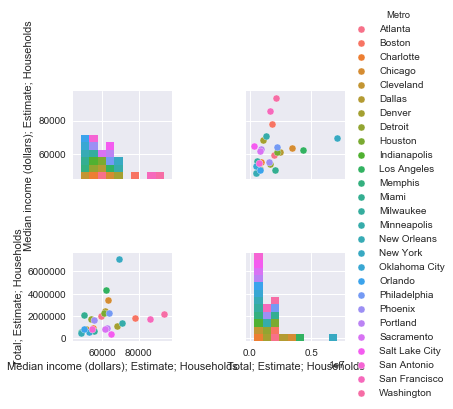

In [219]:
sns.pairplot(nbametros, hue="Metro")

In [220]:
nbacluster = nba.drop('Year', 1)
cols = nbacluster.columns[1:]
cluster = KMeans(n_clusters=4)
nbacluster["cluster"] = cluster.fit_predict(nbacluster[nbacluster.columns[2:]])

In [221]:
pca = PCA(n_components=2)
nbacluster["x"] = pca.fit_transform(nbacluster[cols])[:, 0]
nbacluster["y"] = pca.fit_transform(nbacluster[cols])[:, 1]
nbacluster = nbacluster.reset_index()
team_clusters = nbacluster[["Team", "cluster", "x", "y"]]
team_clusters.head()

,Team,cluster,x,y
0,Atlanta Hawks,2,11.835234,-0.777508
1,Atlanta Hawks,2,11.982275,3.236195
2,Atlanta Hawks,0,-9.004553,-0.735961
3,Atlanta Hawks,0,-8.692195,-0.901725
4,Atlanta Hawks,2,8.402800,-1.876648


In [222]:
final = merge(nbacluster, team_clusters)
final.head()

,index,Team,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT,cluster,x,y
0,0,Atlanta Hawks,48,34,28,12,18,21,0.700000,0.461538,0.585366,2,11.835234,-0.777508
1,1,Atlanta Hawks,48,34,25,13,18,16,0.657895,0.529412,0.585366,2,11.982275,3.236195
2,2,Atlanta Hawks,36,46,21,20,14,26,0.512195,0.350000,0.439024,0,-9.004553,-0.735961
3,3,Atlanta Hawks,36,46,22,19,13,26,0.536585,0.333333,0.439024,0,-8.692195,-0.901725
4,4,Atlanta Hawks,46,36,28,13,17,23,0.682927,0.425000,0.560976,2,8.402800,-1.876648


In [223]:
trace0 = go.Scatter(x = team_clusters[team_clusters.cluster ==0]["x"],
                    y = team_clusters[team_clusters.cluster ==0]["y"],
                    name = "Cluster 1", 
                    mode = "markers", 
                    marker = dict(size =10, 
                                 color = "rgba(15, 152, 152, 0.5)",
                                 line = dict(width=1, color = "rgb(0,0,0)")
                                 )
                   ) 
trace1 = go.Scatter(x = team_clusters[team_clusters.cluster ==1]["x"],
                    y = team_clusters[team_clusters.cluster ==1]["y"],
                    name = "Cluster 2", 
                    mode = "markers", 
                    marker = dict(size =10, 
                                 color = "rgba(180, 18, 180, 0.5)",
                                 line = dict(width=1, color = "rgb(0,0,0)")
                                 )
                   )
trace2 = go.Scatter(x = team_clusters[team_clusters.cluster ==2]["x"],
                    y = team_clusters[team_clusters.cluster ==2]["y"],
                    name = "Cluster 3", 
                    mode = "markers", 
                    marker = dict(size =10, 
                                 color = "rgba(132, 132, 132, 0.5)",
                                 line = dict(width=1, color = "rgb(0,0,0)")
                                 )
                   )
trace3 = go.Scatter(x = team_clusters[team_clusters.cluster ==3]["x"],
                    y = team_clusters[team_clusters.cluster ==3]["y"],
                    name = "Cluster 4", 
                    mode = "markers", 
                    marker = dict(size =10, 
                                 color = "rgba(100, 15, 100, 0.5)",
                                 line = dict(width=1, color = "rgb(0,0,0)")
                                 )
                   )

In [224]:
data = [trace0, trace1, trace2, trace3]
iplot(data)

In [225]:
final["cluster"].value_counts()

2    459
0    345
1    317
3    189
Name: cluster, dtype: int64

In [226]:
final[final.cluster ==0]["Team"].value_counts().head()

GoldenState Warriors    21
NewYork Knicks          20
Detroit Pistons         19
Milwaukee Bucks         18
Indiana Pacers          17
Name: Team, dtype: int64

In [227]:
final[final.cluster ==0].describe().loc[['mean']]

,index,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT,cluster,x,y
mean,584.872464,32.857971,48.052174,21.133333,18.02029,10.55942,28.394203,0.53748,0.268597,0.404891,0.0,-13.002328,-0.665183


In [228]:
final[final.cluster == 1]["Team"].value_counts().head()

LosAngeles Lakers     43
Boston Celtics        39
SanAntonio Spurs      25
Phoenix Suns          23
Philadelphia 76ers    15
Name: Team, dtype: int64

In [229]:
final[final.cluster ==1].describe().loc[['mean']]

,index,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT,cluster,x,y
mean,617.432177,55.129338,24.567823,31.321767,7.545741,22.62776,16.577287,0.805661,0.574156,0.690067,1.0,26.232065,0.988568


In [230]:
final[final.cluster ==2]["Team"].value_counts().head()

Houston Rockets          24
Portland Trailblazers    23
NewYork Knicks           22
Atlanta Hawks            21
Seattle Supersonics      19
Name: Team, dtype: int64

In [231]:
final[final.cluster ==2].describe().loc[['mean']]

,index,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT,cluster,x,y
mean,617.928105,43.535948,36.666667,26.71024,12.389978,15.766885,23.361656,0.682166,0.400275,0.541319,2.0,5.93624,-0.299307


In [232]:
final[final.cluster ==3]["Team"].value_counts().head()

NewYork Knicks            14
NewJersey Nets            13
GoldenState Warriors      11
Minnesota Timberwolves    10
LosAngeles Clippers       10
Name: Team, dtype: int64

In [233]:
final[final.cluster ==3].describe().loc[['mean']]

,index,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT,cluster,x,y
mean,627.650794,21.243386,60.460317,13.952381,26.164021,6.820106,33.121693,0.346768,0.169578,0.259905,3.0,-33.805449,-0.804262


In [234]:
X = nba[["HomePCT", "AwayPCT"]]
Y = nba['Home Wins']

In [235]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(814, 2)
(402, 2)
(814,)
(402,)


In [236]:
def dtclassesNBAHome (nba):
 
    if nba['HomePCT'] >= 0.5:
        return 0
    elif nba['HomePCT'] < 0.5:
        return 1
   
nba["ClassHome"]=nba.apply(lambda nba: dtclassesNBAHome(nba), axis=1)
nba.head()

,Year,Team,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT,ClassHome
0,1968,Atlanta Hawks,48,34,28,12,18,21,0.700000,0.461538,0.585366,0
1,1969,Atlanta Hawks,48,34,25,13,18,16,0.657895,0.529412,0.585366,0
2,1970,Atlanta Hawks,36,46,21,20,14,26,0.512195,0.350000,0.439024,0
3,1971,Atlanta Hawks,36,46,22,19,13,26,0.536585,0.333333,0.439024,0
4,1972,Atlanta Hawks,46,36,28,13,17,23,0.682927,0.425000,0.560976,0


In [237]:
nba["ClassHome"].value_counts()

0    941
1    275
Name: ClassHome, dtype: int64

In [238]:
features = ['Home Wins']
X = nba[features]
y= nba["ClassHome"]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
model1 = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)

y_predict = model1.predict(X_test)
accuracy_score(y_test,y_predict)

0.9342105263157895

In [239]:
confusion_matrix(y_test, y_predict)

array([[221,  20],
       [  0,  63]], dtype=int64)

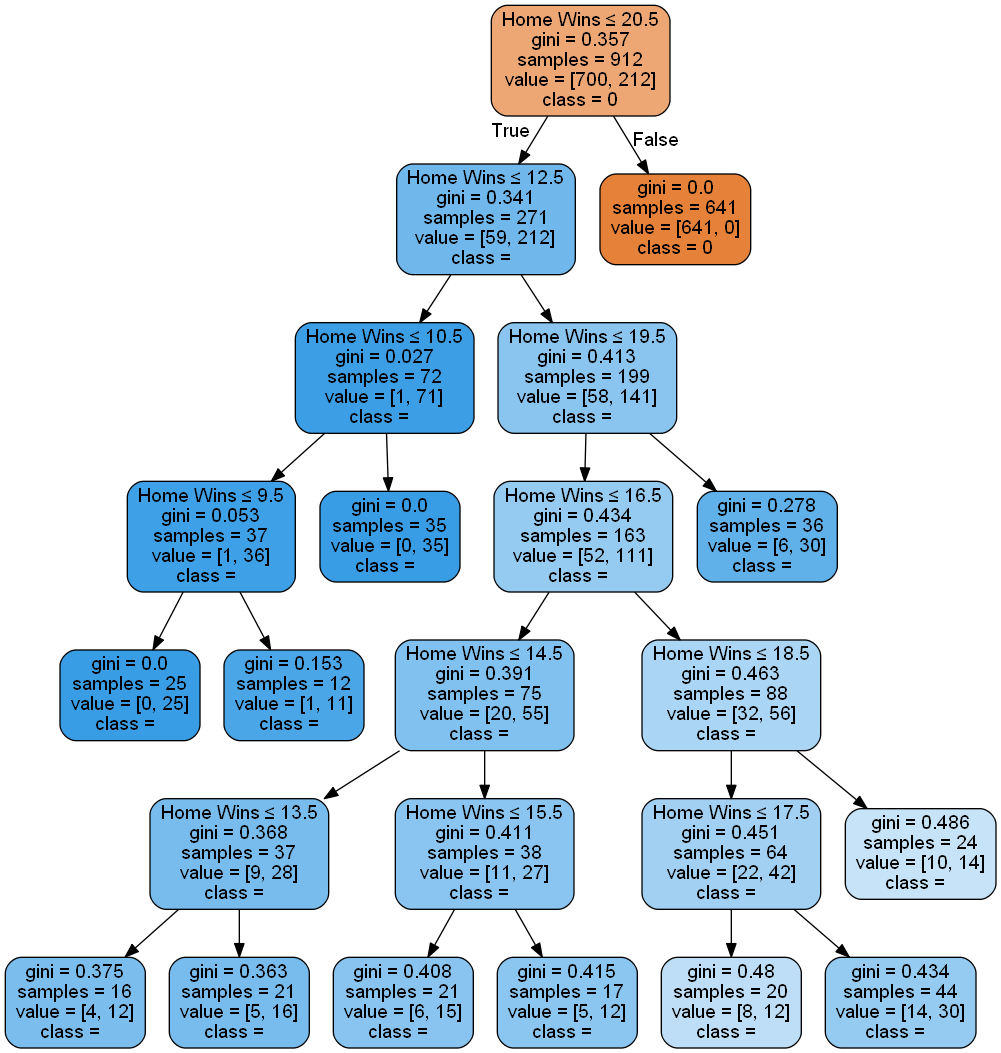

In [240]:
dot_data = StringIO()
export_graphviz(model1, out_file=dot_data, feature_names=features, class_names= str(nba.ClassHome), filled=True, rounded=True, special_characters=True)
graph1 = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph1.create_png())

In [241]:
graph1.write_pdf("HWNBAtree.pdf")

True

In [242]:
def dtclassesNBAAway (nba):
 
    if nba['AwayPCT'] >= 0.5:
        return 0
    elif nba['AwayPCT'] < 0.5:
        return 1
   
nba["ClassAway"]=nba.apply(lambda nba: dtclassesNBAAway(nba), axis=1)
nba.head()

,Year,Team,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT,ClassHome,ClassAway
0,1968,Atlanta Hawks,48,34,28,12,18,21,0.700000,0.461538,0.585366,0,1
1,1969,Atlanta Hawks,48,34,25,13,18,16,0.657895,0.529412,0.585366,0,0
2,1970,Atlanta Hawks,36,46,21,20,14,26,0.512195,0.350000,0.439024,0,1
3,1971,Atlanta Hawks,36,46,22,19,13,26,0.536585,0.333333,0.439024,0,1
4,1972,Atlanta Hawks,46,36,28,13,17,23,0.682927,0.425000,0.560976,0,1


In [243]:
nba["ClassAway"].value_counts()

1    952
0    264
Name: ClassAway, dtype: int64

In [244]:
features2 = ['Away Wins']
X = nba[features2]
y= nba["ClassAway"]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
model2 = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)

y_predict = model2.predict(X_test)
accuracy_score(y_test,y_predict)

0.9868421052631579

In [245]:
confusion_matrix(y_test, y_predict)

array([[ 63,   4],
       [  0, 237]], dtype=int64)

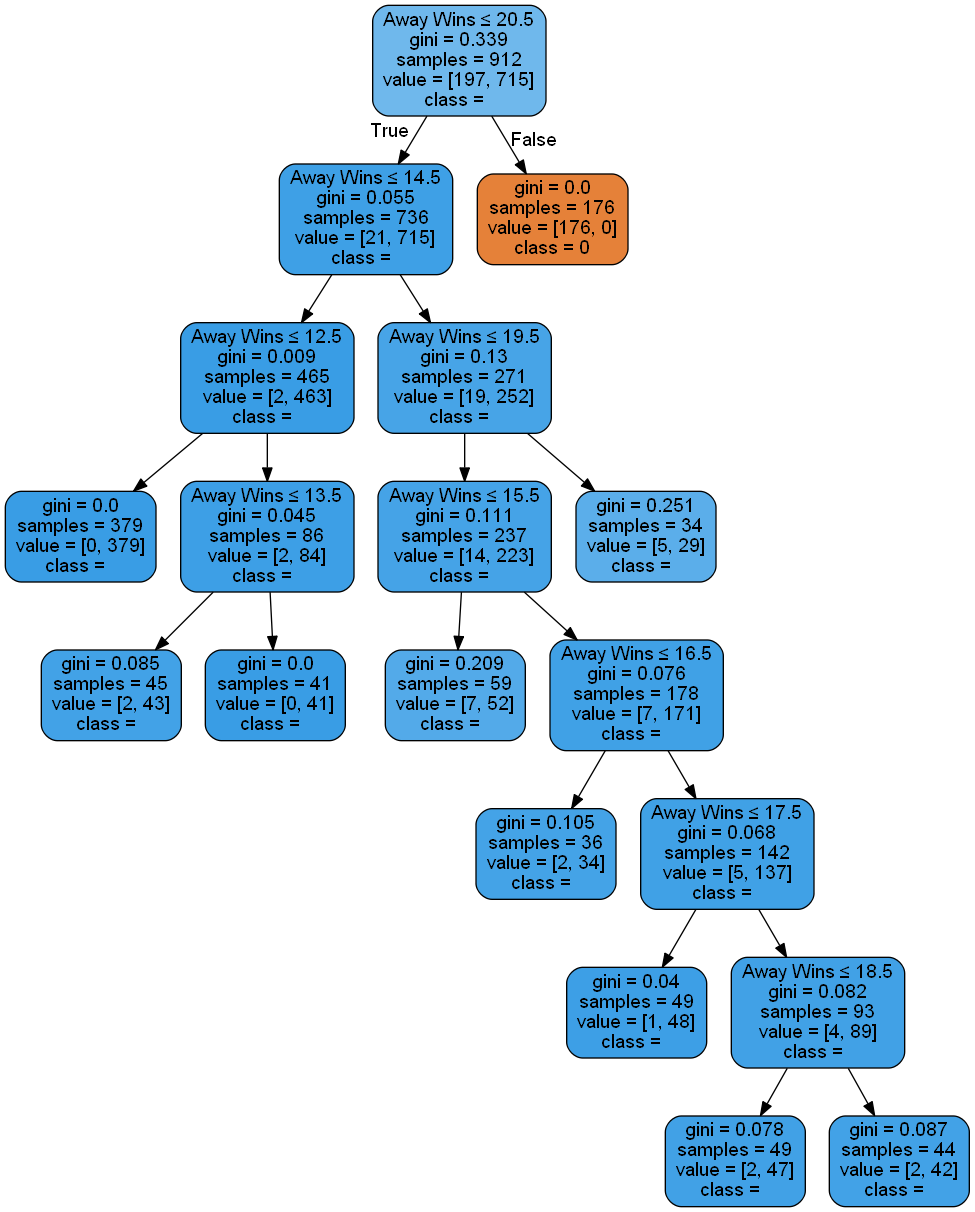

In [246]:
dot_data = StringIO()
export_graphviz(model2, out_file=dot_data, feature_names=features2, class_names= str(nba.ClassAway), filled=True, rounded=True, special_characters=True)
graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph2.create_png())

In [247]:
graph2.write_pdf("AWNBAtree.pdf")

True

In [248]:
dummy_marks = pd.get_dummies(nba["Home Wins"], prefix="Home Wins")
dummy_marks.describe()

,Home Wins_2,Home Wins_4,Home Wins_6,Home Wins_7,Home Wins_8,Home Wins_9,Home Wins_10,Home Wins_11,Home Wins_12,Home Wins_13,Home Wins_14,Home Wins_15,Home Wins_16,Home Wins_17,Home Wins_18,Home Wins_19,Home Wins_20,Home Wins_21,Home Wins_22,Home Wins_23,Home Wins_24,Home Wins_25,Home Wins_26,Home Wins_27,Home Wins_28,Home Wins_29,Home Wins_30,Home Wins_31,Home Wins_32,Home Wins_33,Home Wins_34,Home Wins_35,Home Wins_36,Home Wins_37,Home Wins_38,Home Wins_39,Home Wins_40
count,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.00000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000
mean,0.000822,0.000822,0.003289,0.002467,0.003289,0.011513,0.009868,0.015625,0.017270,0.021382,0.021382,0.023849,0.023849,0.023026,0.046875,0.025493,0.040296,0.043586,0.045230,0.037007,0.044408,0.058388,0.059211,0.050164,0.04852,0.053454,0.053454,0.055099,0.030428,0.034539,0.026316,0.023849,0.025493,0.012336,0.002467,0.004112,0.000822
std,0.028677,0.028677,0.057283,0.049629,0.057283,0.106724,0.098889,0.124071,0.130328,0.144712,0.144712,0.152640,0.152640,0.150049,0.211458,0.157683,0.196734,0.204255,0.207894,0.188856,0.206084,0.234572,0.236115,0.218374,0.21495,0.225029,0.225029,0.228267,0.171832,0.182685,0.160139,0.152640,0.157683,0.110424,0.049629,0.064018,0.028677
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [249]:
cols_to_keep = ["Class", "HomePCT"]
data = nba[cols_to_keep].join(dummy_marks.loc[:, :])

KeyError: "['Class'] not in index"

In [ ]:
data["intercept"]=1.0
data.head()

In [ ]:
xData = data[data.columns[1:]]
yData = data["Class"]

In [ ]:
logit = sm.Logit(yData, xData)

In [ ]:
results = logit.fit()

In [ ]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
results.summary()

In [ ]:
#Those greater than 1 have a greater probabilty of occurring
print(np.exp(results.params))

In [ ]:
#Confidence intervals
print(results.conf_int())

In [330]:
nba2010 = nba[nba.Year == 2010]
nba2010 = nba2010.reset_index(drop=True)
nba2010

,Year,Team,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT,ClassHome,ClassAway
0,2010,Atlanta Hawks,44,38,24,17,20,21,0.585366,0.487805,0.536585,0,1
1,2010,Boston Celtics,56,26,33,8,23,18,0.804878,0.560976,0.682927,0,0
2,2010,Charlotte Bobcats,34,48,21,20,13,28,0.512195,0.317073,0.414634,0,1
3,2010,Chicago Bulls,62,20,36,5,26,15,0.878049,0.634146,0.756098,0,0
4,2010,Cleveland Cavaliers,19,63,12,29,7,34,0.292683,0.170732,0.231707,1,1
5,2010,Dallas Mavericks,57,25,29,12,28,13,0.707317,0.682927,0.695122,0,0
6,2010,Denver Nuggets,50,32,33,8,17,24,0.804878,0.414634,0.609756,0,1
7,2010,Detroit Pistons,30,52,21,20,9,32,0.512195,0.219512,0.365854,0,1
8,2010,GoldenState Warriors,36,46,26,15,10,31,0.634146,0.243902,0.439024,0,1
9,2010,Houston Rockets,43,39,25,16,18,23,0.609756,0.439024,0.524390,0,1


In [325]:
nba2010 =  nba2010.drop(nba2010.index[[8, 11, 17]])
nba2010 = nba2010.reset_index(drop=True)

In [326]:
nba2010mets = nba2010.join(nbametros)
nba2010mets = nba2010mets[['Year','Metro','StateAbb.','Team', 'Median income (dollars); Estimate; Households',
'Total; Estimate; Households',  'Wins','Loss','Home Wins','Home Loss','Away Wins','Away Loss','HomePCT',
'AwayPCT','TotalPCT','ClassHome','ClassAway']]
nba2010mets

,Year,Metro,StateAbb.,Team,Median income (dollars); Estimate; Households,Total; Estimate; Households,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT,ClassHome,ClassAway
0,2010,Atlanta,GA,Atlanta Hawks,59183,1994730,44,38,24,17,20,21,0.585366,0.487805,0.536585,0,1
1,2010,Boston,MA-NH,Boston Celtics,77809,1784448,56,26,33,8,23,18,0.804878,0.560976,0.682927,0,0
2,2010,Charlotte,NC-SC,Charlotte Bobcats,55191,885916,34,48,21,20,13,28,0.512195,0.317073,0.414634,0,1
3,2010,Chicago,IL-IN-WI,Chicago Bulls,63327,3464942,62,20,36,5,26,15,0.878049,0.634146,0.756098,0,0
4,2010,Cleveland,OH,Cleveland Cavaliers,51001,848772,19,63,12,29,7,34,0.292683,0.170732,0.231707,1,1
5,2010,Dallas,TX,Dallas Mavericks,61330,2451163,57,25,29,12,28,13,0.707317,0.682927,0.695122,0,0
6,2010,Denver,CO,Denver Nuggets,68173,1058467,50,32,33,8,17,24,0.804878,0.414634,0.609756,0,1
7,2010,Detroit,MI,Detroit Pistons,54037,1672081,30,52,21,20,9,32,0.512195,0.219512,0.365854,0,1
8,2010,Houston,TX,Houston Rockets,60902,2223829,43,39,25,16,18,23,0.609756,0.439024,0.524390,0,1
9,2010,Indianapolis,IN,Indiana Pacers,54261,749799,37,45,24,17,13,28,0.585366,0.317073,0.451220,0,1
